In [1]:
'''
Analyzing four different IT stocks: Apple, Google, Microsoft, Amazon.
Some questions that we are interested into :

1.) What was the change in price of the stock over time?
2.) What was the moving average of the various stocks?
3.) What was the daily return of the stock on average?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?



'''

"\n1.) What was the change in price of the stock over time?\n2.) What was the daily return of the stock on average?\n3.) What was the moving average of the various stocks?\n4.) What was the correlation between different stocks' closing prices?\n4.) What was the correlation between different stocks' daily returns?\n5.) How much value do we put at risk by investing in a particular stock?\n6.) How can we attempt to predict future stock behavior?\n\n\n"

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader as pr

In [2]:
from pandas_datareader import data, wb
import pandas_datareader.data as pdd

In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [6]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)         #one year ago from today

In [ ]:
# pull stock data from Yahoo Finance.

In [7]:
for stock in tech_list:
    globals()[stock]=pdd.DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-21,110.430000,111.900002,105.650002,105.760002,128275500,103.546087
2015-08-24,94.870003,108.800003,92.000000,103.120003,162206300,100.961352
2015-08-25,111.110001,111.110001,103.500000,103.739998,103601600,101.568368
2015-08-26,107.089996,109.889999,105.050003,109.690002,96774600,107.393819
2015-08-27,112.230003,113.239998,110.019997,112.919998,84616100,110.556200


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,105.035952,106.068730,103.996032,105.057302,4.432390e+07,103.697655
std,8.265272,8.294190,8.180568,8.233759,2.002818e+07,7.752440
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.215000,98.205000,96.427500,97.137499,3.129262e+07,96.300820
50%,105.550000,106.475002,104.849998,105.775002,3.910065e+07,104.469563
75%,111.439999,112.352497,110.024998,111.632499,5.212212e+07,109.489600
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [ ]:
#It shows different percentile of Apple stock for each of the data points as open, close, high , low, volume and adjusted close price.

In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-08-21 to 2016-08-19
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
#it's general information about the Apple stock,  no missing or null data values. 

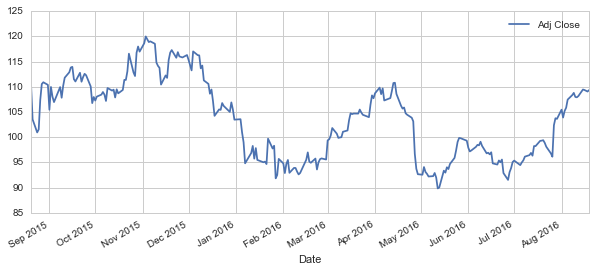

In [27]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))      

In [ ]:
#it shows a historical view of the closing price of Apple for the past year.
#Apple reached it's highest price between Oct 2015 and Nov 2015, reached its lowest in Jun 2016. 
#Currently at a rather high value point comparing the past year's data.

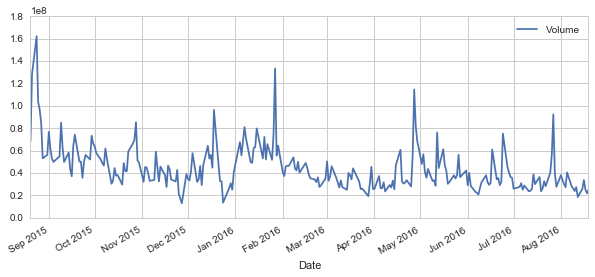

In [28]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
#It gives the volume of traded stock in the past year.
#highest trading volume occured in Aug 2015,lowest trading volume at Dec 2015. 
#currently at a very low trading volume comparing to the past year's data.

In [38]:
#2.now find moving average
# MA= moving average.

In [18]:
ma_day=[10,20,50]                                     # the range of days taking for moving average data.
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))           #take value after % into the string part of  %.
    
    AAPL[column_name]=Series.rolling(AAPL['Adj Close'], ma).mean()   #mean calculator 

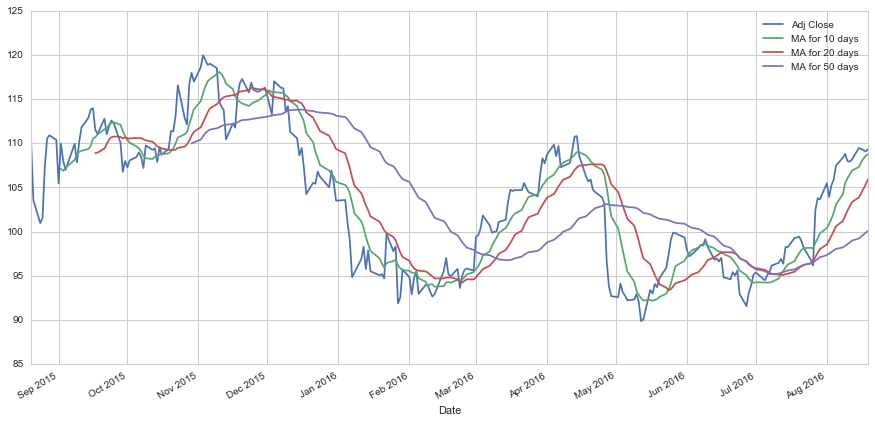

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,7))

In [ ]:
#Moving average is smoother than adjusted closing price of each day.
#as the range of days of moving average increases, trend tends to go more flat.

In [12]:
#3.Now we find daily return
#daily return is calculated using percentage change of the stock price per day.

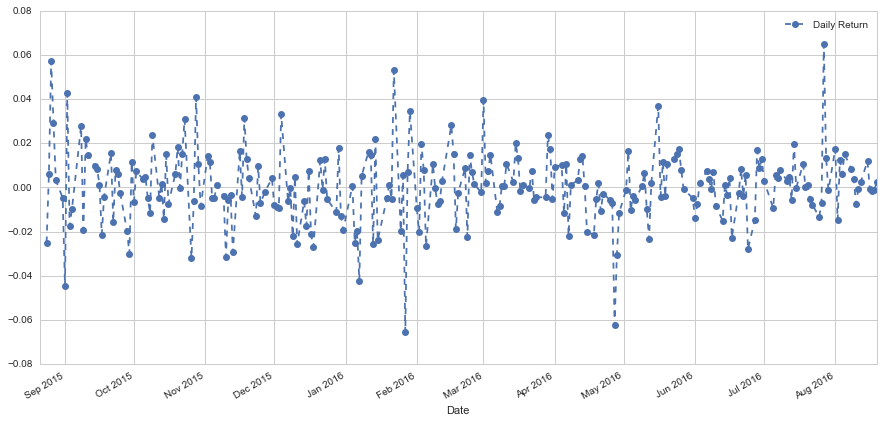

In [13]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,7),legend=True,linestyle='--',marker='o')

In [ ]:
#the highest daily return occured in end of July 2016, lowest occured in end of Jan 2016. 
#currently at just about closing or slightly above 0.

In [14]:
#Now find average daily return

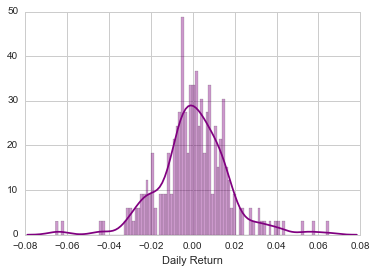

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# observing that most of the return occured closing to 0 or slightly above or below 0.

In [ ]:
# Now find the daily return for all four stocks.


In [18]:
closing_df=pdd.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-21,103.546087,494.470001,612.479980,41.920351
2015-08-24,100.961352,463.369995,589.609985,40.567454
2015-08-25,101.568368,466.369995,582.059998,39.389753
2015-08-26,107.393819,500.769989,628.619995,41.569959
2015-08-27,110.556200,518.369995,637.609985,42.728198


In [20]:
tech_rets=closing_df.pct_change()       

In [21]:
tech_rets.head()            # quick overview of daily returns.

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-21,NaN,NaN,NaN,NaN
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273
2015-08-25,0.006012,0.006474,-0.012805,-0.029031
2015-08-26,0.057355,0.073761,0.079992,0.055350
2015-08-27,0.029447,0.035146,0.014301,0.027862


In [22]:
#4. Using linear regression method between Google and Microsoft.

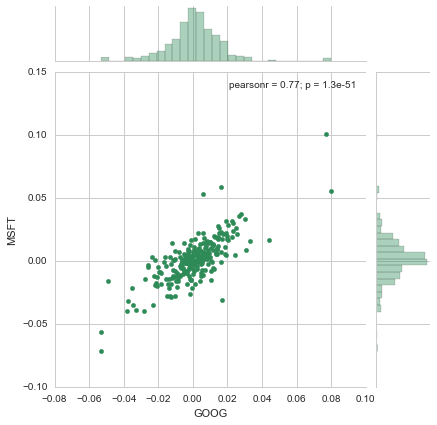

In [64]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

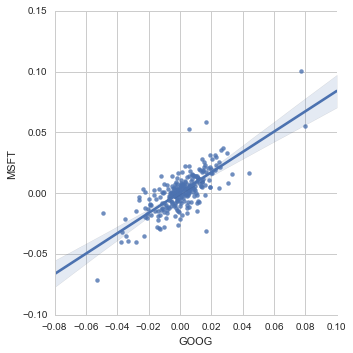

In [23]:
sns.lmplot('GOOG','MSFT',tech_rets)                     # now find the regression line.

In [ ]:
# observing there is a linear correlation between Google and Microsoft stock daily return.

In [24]:
# Now do pairplot for all four stocks.

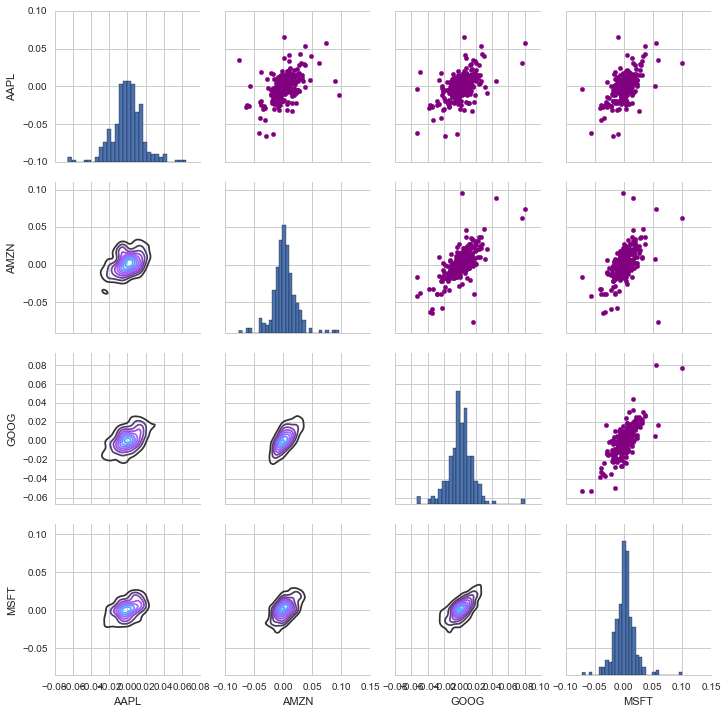

In [70]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
#observing that all four tech stocks daily return are more or less correlated. 


In [ ]:
#Now do pairplot to adjusted closing price of each stocks.

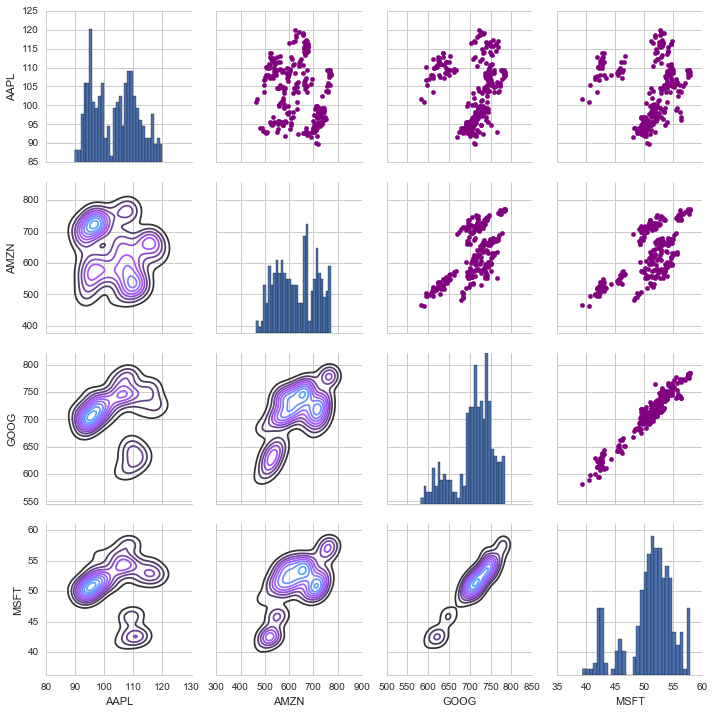

In [26]:
returns_fig=sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [27]:
#observing a closer linear correlation between Microsoft and Google closing price than other pairs.

In [ ]:
# Now run heatmap plot with correlation values for daily returns.

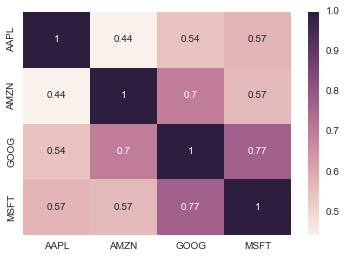

In [77]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

In [ ]:
#observing that highest correlation value occured bwtween Google and Microsoft stock daily returns.
#lowest correlation bwtween Apple and Amazon stock daily returns.

In [28]:
#Now do heatmap for the closing price of stocks.

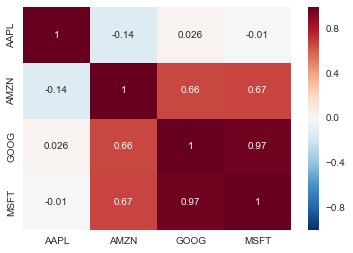

In [29]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [ ]:
#observing that highest correlation occured bwtween Google and Microsoft stock closing price.
#negative correlation bwtween Apple and Amazon, and bwtween Apple and Microsoft stock closing price. 

In [30]:
#5. Now do risk analysis of four stocks
# comparing bwtween the expected value and standard deviation of the daily returns.

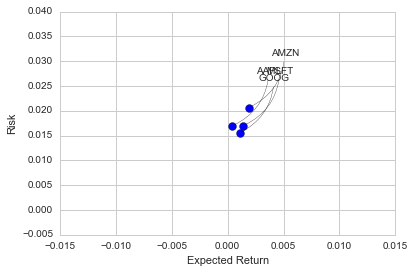

In [31]:
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))
    
    

In [32]:
# we want higher expected return with lower risk
# observing Google stock daily return has the lowest risk to invest for the past year.

In [ ]:
# do histgram of google daily return.

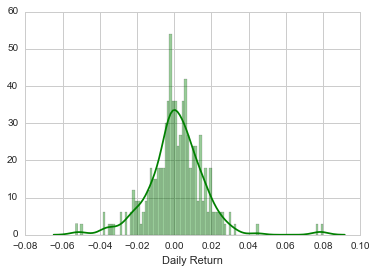

In [38]:
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='green')

In [ ]:
#find the 5th quantile.

In [39]:
rets['GOOG'].quantile(0.05) 

-0.022812261791539334

In [ ]:
# we are 95% confidence that the lost of daily return of Google will not exceed 2.28%.
# or daily return at risk is no more than 2.28% of the investment 95% of time.

In [34]:
#Now use monte carlo method for risk analysis.

In [40]:
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']


In [41]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price


In [42]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2015-08-21,639.780029,640.049988,612.330017,612.479980,4265200,612.479980,NaN
2015-08-24,573.000000,599.330017,565.049988,589.609985,5770300,589.609985,-0.037340
2015-08-25,614.909973,617.450012,581.109985,582.059998,3538000,582.059998,-0.012805
2015-08-26,610.349976,631.710022,599.049988,628.619995,4235900,628.619995,0.079992
2015-08-27,639.400024,643.590027,622.000000,637.609985,3491300,637.609985,0.014301


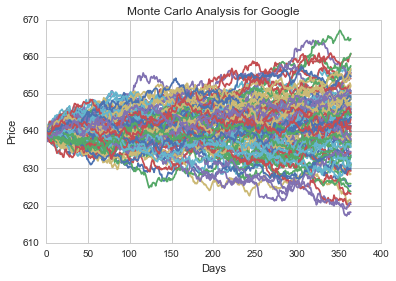

In [45]:
start_price=639.78
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [ ]:
# stock price estimate of google after running monte carlo method for 100 times.
# price estimate ranges from around 618 to 665 up until today.

In [46]:
# Now run monte carlo method for 10000 times for google.

In [47]:
runs=10000
simulation=np.zeros(runs)
for run in xrange(runs):
    simulation[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

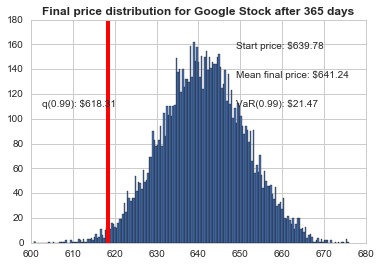

In [48]:
q=np.percentile(simulation,1)
plt.hist(simulation,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
# observing that google's average price is stable comparing with start price.
# 99% time running monte carlo simulation,  our risk (money loss at most) of investing in one share of Google stock is $22.88